<a href="https://colab.research.google.com/github/monikabuss/ISYS5002-2024-semester2/blob/main/analysing_and_visualising_superheroes_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries and Load the Dataset**

In [17]:
import sqlite3

In [24]:
connection = sqlite3.connect('superheroes.db')
cursor=connection.cursor()

Inspect the database schema and find out what tables exist in the "superheroes.db" database, to understand the structure of the database before deciding which specific table(s) to work with or query.

In [25]:
#inspect what is given
sql='''
SELECT name FROM sqlite_master WHERE type='table';
'''
cursor.execute(sql)
cursor.fetchall()


[('your_table',), ('superheroes',), ('users',)]

In [27]:
# inspecting the details of the table
sql='''
PRAGMA table_info('your_table');
'''
cursor.execute(sql)
cursor.fetchall()

[(0, 'id', 'INTEGER', 0, None, 0),
 (1, 'last_name', 'TEXT', 0, None, 0),
 (2, 'first_name', 'TEXT', 0, None, 0),
 (3, 'superhero', 'TEXT', 0, None, 0),
 (4, 'gender', 'TEXT', 0, None, 0),
 (5, 'alignment', 'TEXT', 0, None, 0)]

In [28]:

sql='''
PRAGMA table_info('superheroes');
'''
cursor.execute(sql)
cursor.fetchall()

[(0, 'id', 'INTEGER', 0, None, 0),
 (1, 'last_name', 'TEXT', 0, None, 0),
 (2, 'first_name', 'TEXT', 0, None, 0),
 (3, 'superhero', 'TEXT', 0, None, 0),
 (4, 'gender', 'TEXT', 0, None, 0),
 (5, 'alignment', 'TEXT', 0, None, 0)]

We will be working on the dataset in the 'superheroes' table.
Load the table into Pandas dataframe

In [8]:
import pandas as pd


In [29]:
sql='''
SELECT * from superheroes;
'''
# Load the data into a DataFrame
superheroes_df = pd.read_sql_query(sql, connection)

In [30]:

superheroes_df.head()

,id,last_name,first_name,superhero,gender,alignment
0,1,Kent,Clark,Superman,Male,Good
1,2,Prince,Diana,Wonder Woman,Female,Good
2,3,Wayne,Bruce,Batman,Male,Good
3,4,Curry,Arthur,Aquaman,Male,Good
4,5,Maximoff,Wanda,Scarlet Witch,Female,Good


### **Data Exploration:**

Exploring the structure of the dataset.

Use basic Pandas functions to inspect the data:
- Display the first few rows of the dataset using head().
- Use info() to get information about the data types and missing values.
- Use describe() to get summary statistics for numerical columns (if any).

In [31]:
# Display the first few rows of the dataset
# Display the first few rows of the dataset
superheroes_df.head(10)


,id,last_name,first_name,superhero,gender,alignment
0,1,Kent,Clark,Superman,Male,Good
1,2,Prince,Diana,Wonder Woman,Female,Good
2,3,Wayne,Bruce,Batman,Male,Good
3,4,Curry,Arthur,Aquaman,Male,Good
4,5,Maximoff,Wanda,Scarlet Witch,Female,Good
5,6,Brolin,Josh,Thanos,Male,Evil
6,7,Napier,Joker,Joker,Male,Evil
7,8,Uxas,Darkseid,Darkseid,Male,Evil
8,9,Parker,Peter,Spider-Man,Male,Good
9,10,Goblin,Green,Green Goblin,Male,Evil


In [32]:
# Get general information about the dataset
superheroes_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          25 non-null     int64 
 1   last_name   25 non-null     object
 2   first_name  25 non-null     object
 3   superhero   25 non-null     object
 4   gender      25 non-null     object
 5   alignment   25 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.3+ KB


In [33]:
# Summary statistics of numerical columns

# Summary statistics of numerical columns
superheroes_df.describe()

,id
count,25.000000
mean,13.000000
std,7.359801
min,1.000000
25%,7.000000
50%,13.000000
75%,19.000000
max,25.000000


### **Pre-processing and cleaning data**





In [36]:
df = pd.read_csv('superheroes_modified.csv')
df.info()
#missing data cuz alignment 26 not 29, how do you proceed with missing data, explain

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          29 non-null     int64 
 1   last_name   29 non-null     object
 2   first_name  29 non-null     object
 3   superhero   29 non-null     object
 4   gender      29 non-null     object
 5   alignment   26 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.5+ KB


**Check for duplicates**

In [38]:
# Check for duplicates based on all columns
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [41]:
# To see the duplicate rows, you can use boolean indexing:

#create temporary dataframe, what is duplicated is saved there??
duplicates = df[df.duplicated()]
duplicates


#IN ASSIGNMENT: find duplicates and drop them if yes, this only filters and does not remove
display(df.drop_duplicates)

<bound method DataFrame.drop_duplicates of     id  last_name   first_name       superhero  gender alignment
0   14    Quinzel       Harley    Harley Quinn  Female      Evil
1   15       Kyle       Selina        Catwoman  Female      Evil
2   16  Darkholme     Mystique        Mystique  Female       NaN
3   18        Ivy       Poison      Poison Ivy  Female      Evil
4   19      Moone  Enchantress     Enchantress  Female      Evil
5    2     Prince        Diana    Wonder Woman  Female      Good
6    5   Maximoff        Wanda   Scarlet Witch  Female      Good
7   20   Romanoff      Natasha     Black Widow  Female      Good
8   21    Danvers        Carol  Captain Marvel  Female      Good
9    6     Brolin         Josh          Thanos    Male      Evil
10   7     Napier        Joker           Joker    Male      Evil
11   8       Uxas     Darkseid        Darkseid    Male      Evil
12  10     Goblin        Green    Green Goblin    Male      Evil
13  11      Skull          Red       Red Skull    Male      Evil
14  12     Kasady      Carnage         Carnage    Male      Evil
15  22   Lensherr      Magneto         Magneto    Male      Evil
16  23  Laufeyson         Loki            Loki    Male      Evil
17  24     Luthor          Lex      Lex Luthor    Male       NaN
18  25      Brock        Venom           Venom    Male      Evil
19   1       Kent        Clark        Superman    Male      Good
20   3      Wayne        Bruce          Batman    Male      Good
21   4      Curry       Arthur         Aquaman    Male       NaN
22   9     Parker        Peter      Spider-Man    Male      Good
23  13      Stark         Tony        Iron Man    Male      Good
24  17      Allen        Barry       The Flash    Male      Good
25   2     Prince        Diana    Wonder Woman  Female      Good
26   5   Maximoff        Wanda   Scarlet Witch  Female      Good
27  20   Romanoff      Natasha     Black Widow  Female      Good
28  25      Brock        Venom           Venom    Male      Evil>

In [42]:
# Removing Duplicates (if any)
df_1 = df.drop_duplicates()
df_1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          25 non-null     int64 
 1   last_name   25 non-null     object
 2   first_name  25 non-null     object
 3   superhero   25 non-null     object
 4   gender      25 non-null     object
 5   alignment   22 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.4+ KB


**Check for missing values**

we use df_1 for further analysis because it does not contain duplicates

In [43]:
# Check for missing values, very important for the assessment, true+missing
df_1.isnull()


,id,last_name,first_name,superhero,gender,alignment
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,True
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [45]:
# Check for missing values in each row
null_records = df_1.isnull().any(axis=1)

df_1[null_records]

,id,last_name,first_name,superhero,gender,alignment
2,16,Darkholme,Mystique,Mystique,Female,NaN
17,24,Luthor,Lex,Lex Luthor,Male,NaN
21,4,Curry,Arthur,Aquaman,Male,NaN


**Handling missing values**

If there are missing values, we can choose to remove or impute them.

For demonstration, we'll impute missing values in the 'alignment' column with 'Unknown'.

how to handle -- good source geeksforgeeks

In [46]:
# impute missing values with 'Unknown'.
df_1['alignment'].fillna('Unknown', inplace = True)

<ipython-input-46-fbe0031d9d38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['alignment'].fillna('Unknown', inplace = True)


In [47]:

df_1

,id,last_name,first_name,superhero,gender,alignment
0,14,Quinzel,Harley,Harley Quinn,Female,Evil
1,15,Kyle,Selina,Catwoman,Female,Evil
2,16,Darkholme,Mystique,Mystique,Female,Unknown
3,18,Ivy,Poison,Poison Ivy,Female,Evil
4,19,Moone,Enchantress,Enchantress,Female,Evil
5,2,Prince,Diana,Wonder Woman,Female,Good
6,5,Maximoff,Wanda,Scarlet Witch,Female,Good
7,20,Romanoff,Natasha,Black Widow,Female,Good
8,21,Danvers,Carol,Captain Marvel,Female,Good
9,6,Brolin,Josh,Thanos,Male,Evil


In [48]:

df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          25 non-null     int64 
 1   last_name   25 non-null     object
 2   first_name  25 non-null     object
 3   superhero   25 non-null     object
 4   gender      25 non-null     object
 5   alignment   25 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.4+ KB


## Data Analysis


**Analysing the distribution of superheroes based on their gender**

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the count of superheroes by gender
gender_counts = df['gender'].value_counts()

gender_counts

,count
gender,
Male,17
Female,12


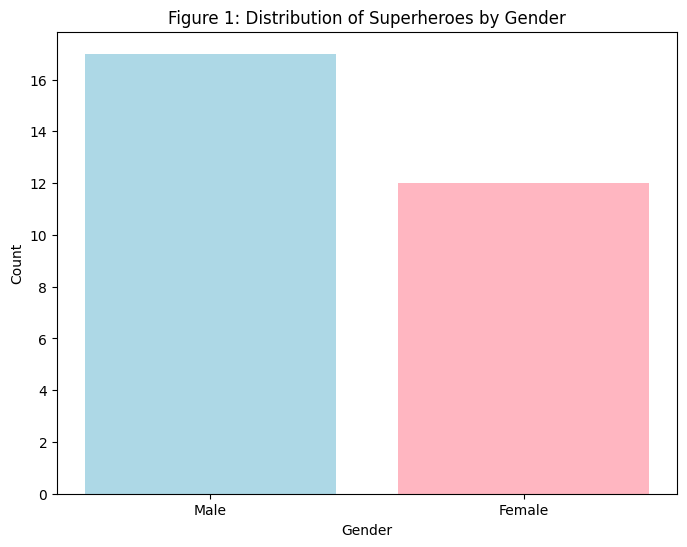

In [51]:
# Create a bar chart to visualize the distribution, number figures for report in assignment also
plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values, color=['lightblue', 'lightpink', 'lightgray'])
plt.title('Figure 1: Distribution of Superheroes by Gender')
plt.xlabel('Gender (m/f)')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Display the plot
plt.show()


**Analysing the distribution of superheroes based on their alignment**

In [56]:
# Calculate the count of superheroes by alignment
alignment_counts = df_1['alignment'].value_counts()

alignment_counts

,count
alignment,
Evil,13
Good,9
Unknown,3


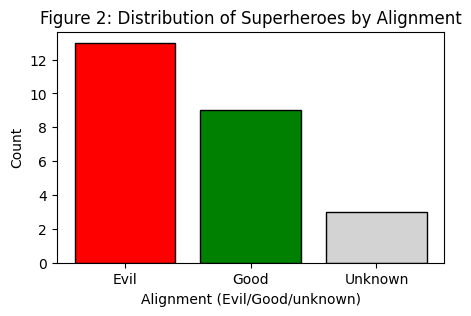

In [62]:
# Create a pie chart to visualize the distribution
plt.figure(figsize=(5, 3))
plt.bar(alignment_counts.index, alignment_counts.values, color=['red', 'green', 'lightgray'], edgecolor='black')
plt.title('Figure 2: Distribution of Superheroes by Alignment')
plt.xlabel('Alignment (Evil/Good/unknown)')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Display the plot
plt.show()





<function matplotlib.pyplot.show(close=None, block=None)>

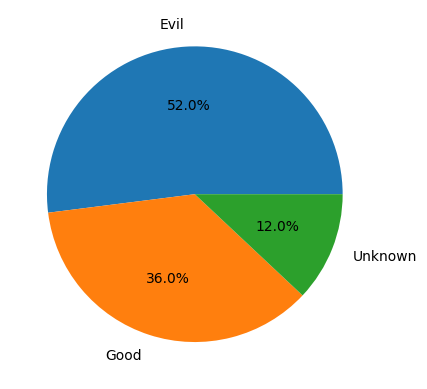

In [64]:
plt.pie(alignment_counts, labels=alignment_counts.index, labeldistance=1.15, autopct='%1.1f%%')
plt.show
#add title etc

## **Exploring the  relationship between gender and alignment among superheroes.**

We examine whether there are any gender-based patterns in superhero alignment.

We look for trends, such as whether a particular gender is more commonly associated with being "Good" or "Evil."

### Superhero Alignment Distribution by Gender Analysis

In [65]:
import pandas as pd

# Group the data by gender and alignment
grouped_data = df.groupby(['gender', 'alignment'])

# Calculate the count for each group
gender_alignment_counts = grouped_data.size()

# Reshape the result to have gender as rows and alignment as columns
gender_alignment_counts = gender_alignment_counts.unstack()

# Replace any missing values with zeros
gender_alignment_counts = gender_alignment_counts.fillna(0)

# Display the resulting DataFrame
(gender_alignment_counts)

alignment,Evil,Good
gender,,
Female,4,7
Male,10,5


**Visualising the distribution of "Good" and "Evil" superheroes within each gender category**

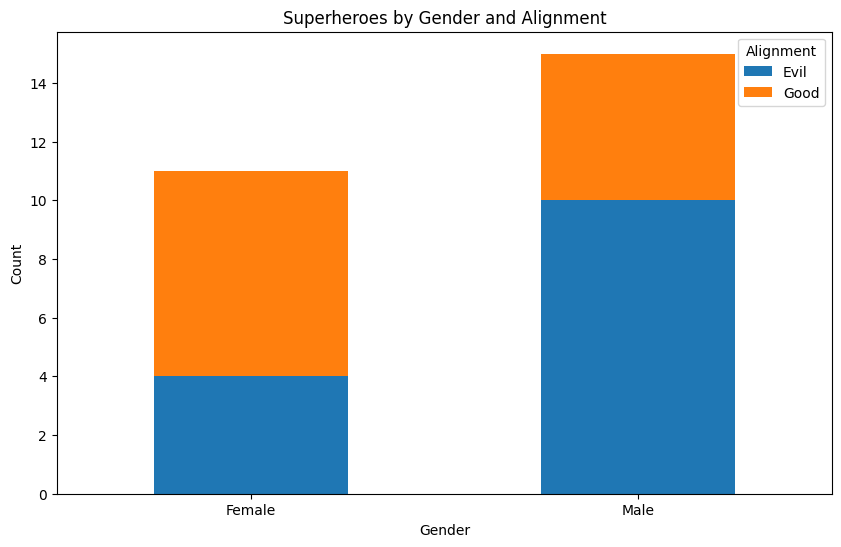

In [66]:
# Create a stacked bar chart
gender_alignment_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Superheroes by Gender and Alignment')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Alignment')

# Display the plot
plt.show()


**Grouped bar chart**

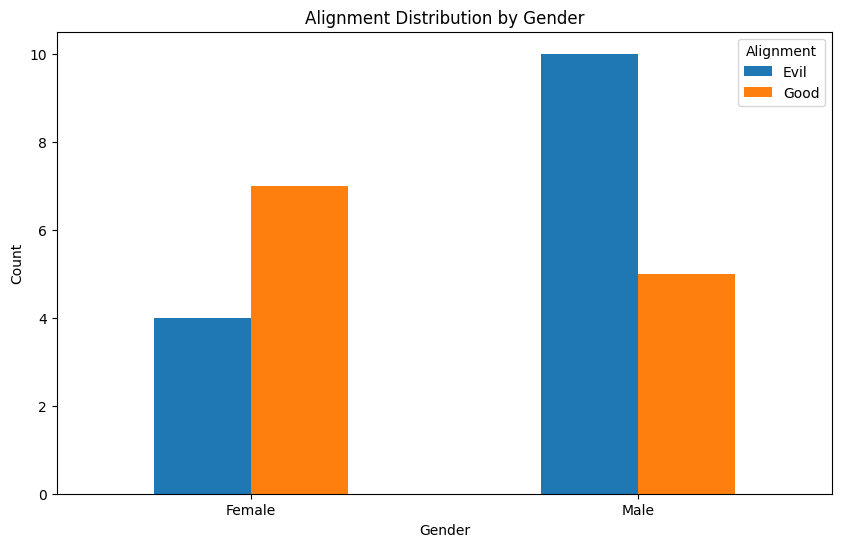

In [67]:
# Create a grouped bar chart to visualize the distribution
ax = gender_alignment_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Alignment Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Alignment', loc='upper right', labels=['Evil', 'Good'])
plt.xticks(rotation=0)

# Display the plot
plt.show()


**Horizontal stacked bar**

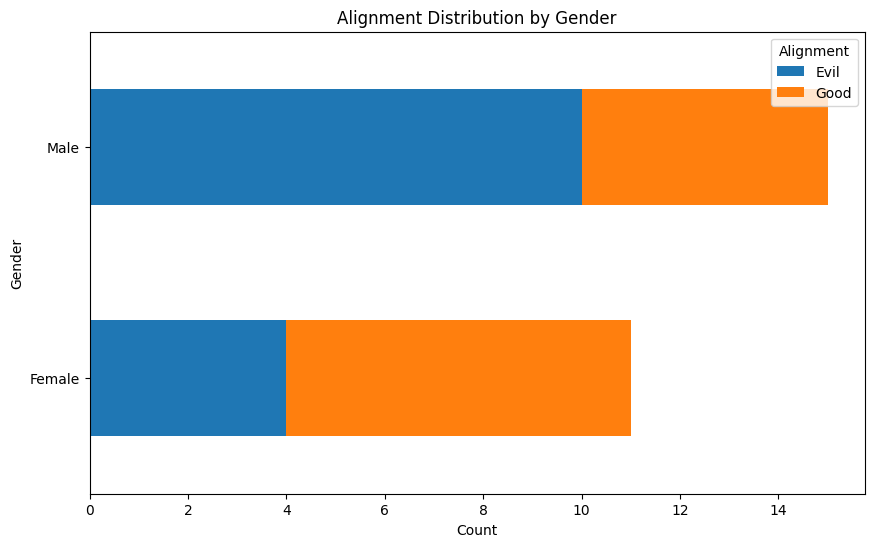

In [68]:
# Create a horizontal bar chart to visualize the distribution
ax = gender_alignment_counts.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.title('Alignment Distribution by Gender')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.legend(title='Alignment', loc='upper right', labels=['Evil', 'Good'])

# Display the plot
plt.show()

## Activity: anlayse and Visualise
**Superhero Gender Distribution by Alignment Analysis**

In [69]:
# Group the data by alignment and gender
grouped_data = df.groupby(['alignment','gender'])

# Calculate the count for each group
alignment_gender_counts = grouped_data.size()

# Reshape the result to have gender as rows and alignment as columns
alignment_gender_counts = alignment_gender_counts.unstack()

# Replace any missing values with zeros
alignment_gender_counts = alignment_gender_counts.fillna(0)

# Display the resulting DataFrame
(alignment_gender_counts)

gender,Female,Male
alignment,,
Evil,4,10
Good,7,5


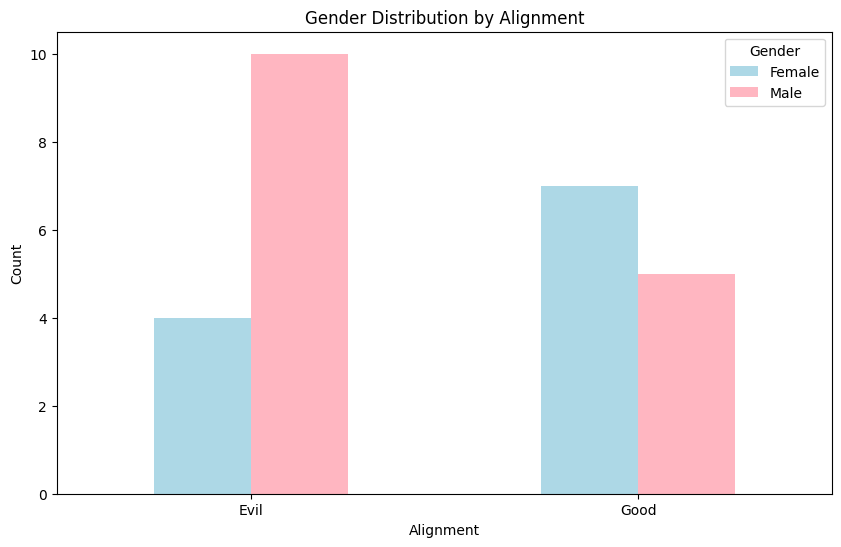

In [75]:
# Create a grouped bar chart to visualize the distribution
ax =alignment_gender_counts.plot(kind='bar',color=['lightblue', 'lightpink', 'lightgray'], figsize=(10, 6))

plt.title('Gender Distribution by Alignment')
plt.xlabel('Alignment')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right', labels=['Female', 'Male'])
plt.xticks(rotation=0)

# Display the plot
plt.show()

